In [1]:
import numpy as np
import xarray as xr
import extremespaper as ex
import viz
import mplRC
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cftime
import datetime as dt
import os
import glob
import matplotlib.cm as mcm
import warnings
import dask.array as da
mplRC.paperRC2()

warnings.filterwarnings(action='ignore',message='Mean of empty slice',category=RuntimeWarning)
warnings.filterwarnings(action='ignore',message='invalid value encountered in scalar divide',
                        category=RuntimeWarning)

/home/ords/crd/ccrn/reo000/mamba_files/envs/mpy39dc/lib/python3.9/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
masks=ex.loadMasks()

qq=.95
freq='daily'
chdef0={'time':-1,'lat':90,'lon':90}
scen0='ESM4_historical_D1'
yrspan0=ex.dictScenDates[scen0]
combolist=[('tos','spco2'),('tos','omega_arag_0'),]#('tos','spco2'),('tos','omega_arag_0','spco2')]#,('tos','hplusos','o2_mean_100_600')]
varlist=['tos','spco2','omega_arag_0']#,'spco2']#,'o2_mean_100_600']
exlist=['is_exA','is_exD','is_exE100','is_exG100']

In [3]:
hist='ESM4_historical_D1'
s126='ESM4_ssp126_D1'
s370='ESM4_ssp370_D1'
s534='ESM4_ssp534-over_D1'
scenList=[hist,s126,s370]

In [4]:
ff={}
sf={}
for ivar in ['tos','omega_arag_0','spco2']:
    exdir=ex.exdirs[ivar]
    quant=qq if exdir==1 else np.round(1-qq,2)
    qstring=f"p{quant*100}"
    print(ivar,exdir)
    sf[ivar]=xr.open_dataset(ex.fNameStatsFile('ESM4_historical_D1',
                                               ex.dictScenDates['ESM4_historical_D1'],'daily',ivar))
    for iscen in ['ESM4_historical_D1','ESM4_ssp126_D1','ESM4_ssp370_D1']:
        yrspan=ex.dictScenDates[iscen]
        fp0=ex.exstats_path(ivar,iscen,yrspan,scen0,yrspan0,freq,exdir,quant,calcDurAmp=False,grid='1x1')
        if os.path.exists(fp0):
            ff[(ivar,iscen)]=xr.open_dataset(fp0)
            print(fp0)
        else:
            raise Exception(f'file missing: {fp0}')

tos 1
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/calcs/extremes/exstats/exstats_GFDL-ESM4.1.ESM4_historical_D1.1975_2014.refESM4_historical_D1.1975_2014.daily.tos.max.p95.0.1x1.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/calcs/extremes/exstats/exstats_GFDL-ESM4.1.ESM4_ssp126_D1.2061_2100.refESM4_historical_D1.1975_2014.daily.tos.max.p95.0.1x1.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/calcs/extremes/exstats/exstats_GFDL-ESM4.1.ESM4_ssp370_D1.2061_2100.refESM4_historical_D1.1975_2014.daily.tos.max.p95.0.1x1.nc
omega_arag_0 -1
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/calcs/extremes/exstats/exstats_GFDL-ESM4.1.ESM4_historical_D1.1975_2014.refESM4_historical_D1.1975_2014.daily.omega_arag_0.min.p5.0.1x1.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/calcs/extremes/exstats/exstats_GFDL-ESM4.1.ESM4_ssp126_D1.2061_2100.refESM4_historical_D1.1975_2014.daily.omega_arag_0.min.p5.0.1x1.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/r

/work/ebo/calcs/extremes/exstats_regts/exstats_regts_GFDL-ESM4.1.ESM4_ssp126_D1.2061_2100.refESM4_historical_D1.1975_2014.daily.omega_arag_0.min.p5.0.Steller.1x1.nc
/work/ebo/calcs/extremes/exstats_regts/exstats_regts_GFDL-ESM4.1.ESM4_ssp370_D1.2061_2100.refESM4_historical_D1.1975_2014.daily.tos.max.p95.0.Steller.1x1.nc
/work/ebo/calcs/extremes/exstats_regts/exstats_regts_GFDL-ESM4.1.ESM4_ssp370_D1.2061_2100.refESM4_historical_D1.1975_2014.daily.hplusos.max.p95.0.Steller.1x1.nc
/work/ebo/calcs/extremes/exstats_regts/exstats_regts_GFDL-ESM4.1.ESM4_ssp370_D1.2061_2100.refESM4_historical_D1.1975_2014.daily.omega_arag_0.min.p5.0.Steller.1x1.nc
/work/ebo/calcs/extremes/exstats_regts/exstats_regts_GFDL-ESM4.1.ESM4_historical_D1.1975_2014.refESM4_historical_D1.1975_2014.daily.tos.max.p95.0.Humpback.1x1.nc
/work/ebo/calcs/extremes/exstats_regts/exstats_regts_GFDL-ESM4.1.ESM4_historical_D1.1975_2014.refESM4_historical_D1.1975_2014.daily.hplusos.max.p95.0.Humpback.1x1.nc
/work/ebo/calcs/extremes

In [5]:
ffc={}
for combo in combolist:
    for iscen in ['ESM4_historical_D1','ESM4_ssp126_D1','ESM4_ssp370_D1']:
        yrspan=ex.dictScenDates[iscen]
        fpath=ex.exstats_multi_path(combo,iscen,yrspan,scen0,yrspan0,freq,qq,calcDur=False)

        ffc[(combo,iscen)]=xr.open_dataset(fpath)
        print(fpath)

/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/calcs/extremes/exstats/exstats_multi_GFDL-ESM4.1.ESM4_historical_D1.1975_2014.refESM4_historical_D1.1975_2014.daily.tos_spco2.p95.0_5.0.1x1.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/calcs/extremes/exstats/exstats_multi_GFDL-ESM4.1.ESM4_ssp126_D1.2061_2100.refESM4_historical_D1.1975_2014.daily.tos_spco2.p95.0_5.0.1x1.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/calcs/extremes/exstats/exstats_multi_GFDL-ESM4.1.ESM4_ssp370_D1.2061_2100.refESM4_historical_D1.1975_2014.daily.tos_spco2.p95.0_5.0.1x1.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/calcs/extremes/exstats/exstats_multi_GFDL-ESM4.1.ESM4_historical_D1.1975_2014.refESM4_historical_D1.1975_2014.daily.tos_omega_arag_0.p95.0_5.0.1x1.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/calcs/extremes/exstats/exstats_multi_GFDL-ESM4.1.ESM4_ssp126_D1.2061_2100.refESM4_historical_D1.1975_2014.daily.tos_omega_arag_0.p95.0_5.0.1x1.nc
/space/h

In [6]:
# separate line for each site
# separate axes for each scenario
# group by variable (axes label)
# order by threshold (color)
# bar is number of days

In [7]:
# organize data in dictionary
# PctAT=pcercent of area*time meeting stress threshold:
# SC=seasonally constant; SV= seasonally varying; RF= fixed reference; RA= adaptive reference
# other categories: DHW, OA1, OA3
# variables/combos: tos, hplusos, omega_arag_0
#ff[(lkey,iscen,ivar)]
PctAT={}
for lkey in masks.keys():
    for iscen in scenList:
        PctAT[(lkey,iscen)]={}
        for ivar in varlist:
            PctAT[(lkey,iscen)][(ivar,'SC','RF')]=np.sum(np.sum(masks[lkey].mask*ff[(ivar,iscen)].is_exA_sum).values/(40*365*np.sum(np.sum(masks[lkey].mask))))*100
            PctAT[(lkey,iscen)][(ivar,'SV','RF')]=np.sum(np.sum(masks[lkey].mask*ff[(ivar,iscen)].is_exD_sum).values/(40*365*np.sum(np.sum(masks[lkey].mask))))*100
            PctAT[(lkey,iscen)][(ivar,'SC','RA')]=np.sum(np.sum(masks[lkey].mask*ff[(ivar,iscen)].is_exE100_sum).values/(40*365*np.sum(np.sum(masks[lkey].mask))))*100
            PctAT[(lkey,iscen)][(ivar,'SV','RA')]=np.sum(np.sum(masks[lkey].mask*ff[(ivar,iscen)].is_exG100_sum).values/(40*365*np.sum(np.sum(masks[lkey].mask))))*100

        for combo in combolist:
            PctAT[(lkey,iscen)][(combo,'SC','RF')]=np.sum(np.sum(masks[lkey].mask*ffc[(combo,iscen)].is_exA_sum).values/(40*365*np.sum(np.sum(masks[lkey].mask))))*100
            PctAT[(lkey,iscen)][(combo,'SV','RF')]=np.sum(np.sum(masks[lkey].mask*ffc[(combo,iscen)].is_exD_sum).values/(40*365*np.sum(np.sum(masks[lkey].mask))))*100
            PctAT[(lkey,iscen)][(combo,'SC','RA')]=np.sum(np.sum(masks[lkey].mask*ffc[(combo,iscen)].is_exE100_sum).values/(40*365*np.sum(np.sum(masks[lkey].mask))))*100
            PctAT[(lkey,iscen)][(combo,'SV','RA')]=np.sum(np.sum(masks[lkey].mask*ffc[(combo,iscen)].is_exG100_sum).values/(40*365*np.sum(np.sum(masks[lkey].mask))))*100

In [8]:
PctAT[('NE Canyons','ESM4_ssp370_D1')]

{('tos', 'SC', 'RF'): 22.670091324200914,
 ('tos', 'SV', 'RF'): 58.62100456621005,
 ('tos', 'SC', 'RA'): 18.755707762557076,
 ('tos', 'SV', 'RA'): 35.56392694063927,
 ('spco2', 'SC', 'RF'): 100.0,
 ('spco2', 'SV', 'RF'): 100.0,
 ('spco2', 'SC', 'RA'): 100.0,
 ('spco2', 'SV', 'RA'): 100.0,
 ('omega_arag_0', 'SC', 'RF'): 95.72488584474887,
 ('omega_arag_0', 'SV', 'RF'): 100.0,
 ('omega_arag_0', 'SC', 'RA'): 77.48972602739727,
 ('omega_arag_0', 'SV', 'RA'): 99.2351598173516,
 (('tos', 'spco2'), 'SC', 'RF'): 22.670091324200914,
 (('tos', 'spco2'), 'SV', 'RF'): 58.62100456621005,
 (('tos', 'spco2'), 'SC', 'RA'): 18.755707762557076,
 (('tos', 'spco2'), 'SV', 'RA'): 35.56392694063927,
 (('tos', 'omega_arag_0'), 'SC', 'RF'): 19.004566210045663,
 (('tos', 'omega_arag_0'), 'SV', 'RF'): 58.62100456621005,
 (('tos', 'omega_arag_0'), 'SC', 'RA'): 3.530821917808219,
 (('tos', 'omega_arag_0'), 'SV', 'RA'): 34.799086757990864}

In [9]:
PctAT[('NE Canyons','ESM4_ssp370_D1')]

{('tos', 'SC', 'RF'): 22.670091324200914,
 ('tos', 'SV', 'RF'): 58.62100456621005,
 ('tos', 'SC', 'RA'): 18.755707762557076,
 ('tos', 'SV', 'RA'): 35.56392694063927,
 ('spco2', 'SC', 'RF'): 100.0,
 ('spco2', 'SV', 'RF'): 100.0,
 ('spco2', 'SC', 'RA'): 100.0,
 ('spco2', 'SV', 'RA'): 100.0,
 ('omega_arag_0', 'SC', 'RF'): 95.72488584474887,
 ('omega_arag_0', 'SV', 'RF'): 100.0,
 ('omega_arag_0', 'SC', 'RA'): 77.48972602739727,
 ('omega_arag_0', 'SV', 'RA'): 99.2351598173516,
 (('tos', 'spco2'), 'SC', 'RF'): 22.670091324200914,
 (('tos', 'spco2'), 'SV', 'RF'): 58.62100456621005,
 (('tos', 'spco2'), 'SC', 'RA'): 18.755707762557076,
 (('tos', 'spco2'), 'SV', 'RA'): 35.56392694063927,
 (('tos', 'omega_arag_0'), 'SC', 'RF'): 19.004566210045663,
 (('tos', 'omega_arag_0'), 'SV', 'RF'): 58.62100456621005,
 (('tos', 'omega_arag_0'), 'SC', 'RA'): 3.530821917808219,
 (('tos', 'omega_arag_0'), 'SV', 'RA'): 34.799086757990864}

In [10]:
PctAT[('FL Keys','ESM4_ssp370_D1')]

{('tos', 'SC', 'RF'): 32.967123287671235,
 ('tos', 'SV', 'RF'): 87.29452054794521,
 ('tos', 'SC', 'RA'): 26.12191780821918,
 ('tos', 'SV', 'RA'): 64.84657534246575,
 ('spco2', 'SC', 'RF'): 100.0,
 ('spco2', 'SV', 'RF'): 100.0,
 ('spco2', 'SC', 'RA'): 100.0,
 ('spco2', 'SV', 'RA'): 100.0,
 ('omega_arag_0', 'SC', 'RF'): 100.0,
 ('omega_arag_0', 'SV', 'RF'): 100.0,
 ('omega_arag_0', 'SC', 'RA'): 100.0,
 ('omega_arag_0', 'SV', 'RA'): 100.0,
 (('tos', 'spco2'), 'SC', 'RF'): 32.967123287671235,
 (('tos', 'spco2'), 'SV', 'RF'): 87.29452054794521,
 (('tos', 'spco2'), 'SC', 'RA'): 26.12191780821918,
 (('tos', 'spco2'), 'SV', 'RA'): 64.84657534246575,
 (('tos', 'omega_arag_0'), 'SC', 'RF'): 32.967123287671235,
 (('tos', 'omega_arag_0'), 'SV', 'RF'): 87.29452054794521,
 (('tos', 'omega_arag_0'), 'SC', 'RA'): 26.12191780821918,
 (('tos', 'omega_arag_0'), 'SV', 'RA'): 64.84657534246575}

In [11]:
lstr={'tos':'SST',
      'hplusos':'Surface H$^+$',
      'spco2':'Surface pCO$_2$',
      'omega_arag_0':'Surface $\Omega _a$'}

scenLabels={'ESM4_ssp126_D1':'SSP1-2.6','ESM4_ssp370_D1':'SSP3-7.0',
            'ESM4_ssp534-over_D1':'SSP5-3.4-OS',
           'ESM4_historical_D1':'Historical','126':'SSP1-2.6','245':'SSP2-4.5','370':'SSP3-7.0'}

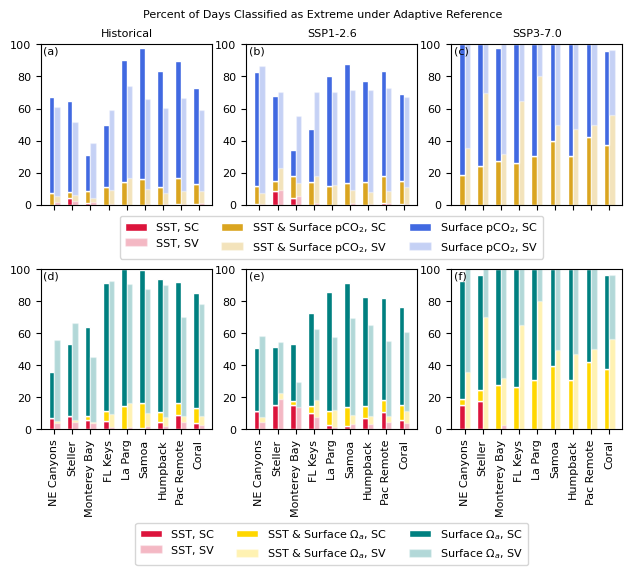

In [12]:
# first example: ESM4_ssp126_D1, NE Canyons
plist=['tos','spco2','omega_arag_0',('tos','spco2'),('tos','omega_arag_0')]
psites=['NE Canyons','Steller', 'Monterey Bay', 'FL Keys', 'La Parg', 'Samoa', 
        'Humpback', 'Pac Remote', 'Coral']
xv=np.arange(len(psites))
fig,ax=plt.subplots(2,len(scenList),figsize=(7.5,5),gridspec_kw={'hspace':.4,})
ww=0.3
ivx1='tos'
colors={('tos','spco2'):['crimson','goldenrod','royalblue'],
        ('tos','omega_arag_0'):['crimson','gold','teal']}
for ls,ivx2 in enumerate(['spco2','omega_arag_0']):
    for ind, iscen in enumerate(scenList):
        bottomC=np.zeros(len(psites))
        bottomV=np.zeros(len(psites))
        vC1=[PctAT[(lkey,iscen)][(ivx1,'SC','RA')]-PctAT[(lkey,iscen)][((ivx1,ivx2),'SC','RA')] for lkey in psites]
        vV1=[PctAT[(lkey,iscen)][(ivx1,'SV','RA')]-PctAT[(lkey,iscen)][((ivx1,ivx2),'SV','RA')] for lkey in psites]
        rects1C=ax[ls,ind].bar(xv-ww/2,vC1,ww,label=f'{lstr[ivx1]}, SC',bottom=bottomC,color=colors[(ivx1,ivx2)][0],edgecolor='w')
        rects1V=ax[ls,ind].bar(xv+ww/2,vV1,ww,label=f'{lstr[ivx1]}, SV',bottom=bottomV,color=colors[(ivx1,ivx2)][0],alpha=.3,edgecolor='w')
        bottomC+=vC1
        bottomV+=vV1
        vC2=[PctAT[(lkey,iscen)][((ivx1,ivx2),'SC','RA')] for lkey in psites]
        vV2=[PctAT[(lkey,iscen)][((ivx1,ivx2),'SV','RA')] for lkey in psites]
        rects2C=ax[ls,ind].bar(xv-ww/2,vC2,ww,label=f'{lstr[ivx1]} & {lstr[ivx2]}, SC',bottom=bottomC,color=colors[(ivx1,ivx2)][1],edgecolor='w')
        rects2V=ax[ls,ind].bar(xv+ww/2,vV2,ww,label=f'{lstr[ivx1]} & {lstr[ivx2]}, SV',bottom=bottomV,color=colors[(ivx1,ivx2)][1],alpha=.3,edgecolor='w')
        bottomC+=vC2
        bottomV+=vV2
        vC3=[PctAT[(lkey,iscen)][(ivx2,'SC','RA')]-PctAT[(lkey,iscen)][((ivx1,ivx2),'SC','RA')] for lkey in psites]
        vV3=[PctAT[(lkey,iscen)][(ivx2,'SV','RA')]-PctAT[(lkey,iscen)][((ivx1,ivx2),'SV','RA')] for lkey in psites]
        rects2C=ax[ls,ind].bar(xv-ww/2,vC3,ww,label=f'{lstr[ivx2]}, SC',bottom=bottomC,color=colors[(ivx1,ivx2)][2],edgecolor='w')
        rects2V=ax[ls,ind].bar(xv+ww/2,vV3,ww,label=f'{lstr[ivx2]}, SV',bottom=bottomV,color=colors[(ivx1,ivx2)][2],alpha=.3,edgecolor='w')

        if ls==0:
            ax[ls,ind].set_title(scenLabels[iscen])
            
    for ind, iscen in enumerate(scenList):
        ax[ls,ind].set_ylim(0,100)
        if ls==1:
            ax[ls,ind].set_xticks(xv,psites,rotation=90)
        else:
            ax[ls,ind].set_xticks(xv)
            ax[ls,ind].set_xticklabels('')

#fig.legend(loc='lower center', ncols=3,bbox_to_anchor=[0.5,-1.5])
ax[0,1].legend(loc='lower center', ncols=3,bbox_to_anchor=[0.5,-.37])
ax[1,1].legend(loc='lower center', ncols=3,bbox_to_anchor=[0.5,-.88])
ax[0,0].annotate('(a)',[-.6,94])
ax[0,1].annotate('(b)',[-.6,94])
ax[0,2].annotate('(c)',[-.6,94])
ax[1,0].annotate('(d)',[-.6,94])
ax[1,1].annotate('(e)',[-.6,94])
ax[1,2].annotate('(f)',[-.6,94])
fig.suptitle('Percent of Days Classified as Extreme under Adaptive Reference',y=.95);# Area$\cdot$
fig.savefig(f'MPASitesBars.png',dpi=300,bbox_inches='tight')

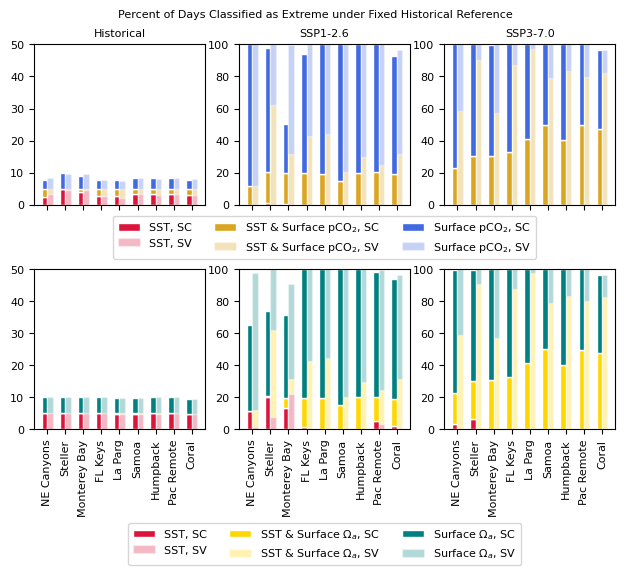

In [13]:
# first example: ESM4_ssp126_D1, NE Canyons
plist=['tos','spco2','omega_arag_0',('tos','spco2'),('tos','omega_arag_0')]
psites=['NE Canyons','Steller', 'Monterey Bay', 'FL Keys', 'La Parg', 'Samoa', 
        'Humpback', 'Pac Remote', 'Coral']
xv=np.arange(len(psites))
fig,ax=plt.subplots(2,len(scenList),figsize=(7.5,5),gridspec_kw={'hspace':.4,})
ww=0.3
ivx1='tos'
colors={('tos','spco2'):['crimson','goldenrod','royalblue'],
        ('tos','omega_arag_0'):['crimson','gold','teal']}
for ls,ivx2 in enumerate(['spco2','omega_arag_0']):
    for ind, iscen in enumerate(scenList):
        bottomC=np.zeros(len(psites))
        bottomV=np.zeros(len(psites))
        vC1=[PctAT[(lkey,iscen)][(ivx1,'SC','RF')]-PctAT[(lkey,iscen)][((ivx1,ivx2),'SC','RF')] for lkey in psites]
        vV1=[PctAT[(lkey,iscen)][(ivx1,'SV','RF')]-PctAT[(lkey,iscen)][((ivx1,ivx2),'SV','RF')] for lkey in psites]
        rects1C=ax[ls,ind].bar(xv-ww/2,vC1,ww,label=f'{lstr[ivx1]}, SC',bottom=bottomC,color=colors[(ivx1,ivx2)][0],edgecolor='w')
        rects1V=ax[ls,ind].bar(xv+ww/2,vV1,ww,label=f'{lstr[ivx1]}, SV',bottom=bottomV,color=colors[(ivx1,ivx2)][0],alpha=.3,edgecolor='w')
        bottomC+=vC1
        bottomV+=vV1
        vC2=[PctAT[(lkey,iscen)][((ivx1,ivx2),'SC','RF')] for lkey in psites]
        vV2=[PctAT[(lkey,iscen)][((ivx1,ivx2),'SV','RF')] for lkey in psites]
        rects2C=ax[ls,ind].bar(xv-ww/2,vC2,ww,label=f'{lstr[ivx1]} & {lstr[ivx2]}, SC',bottom=bottomC,color=colors[(ivx1,ivx2)][1],edgecolor='w')
        rects2V=ax[ls,ind].bar(xv+ww/2,vV2,ww,label=f'{lstr[ivx1]} & {lstr[ivx2]}, SV',bottom=bottomV,color=colors[(ivx1,ivx2)][1],alpha=.3,edgecolor='w')
        bottomC+=vC2
        bottomV+=vV2
        vC3=[PctAT[(lkey,iscen)][(ivx2,'SC','RF')]-PctAT[(lkey,iscen)][((ivx1,ivx2),'SC','RF')] for lkey in psites]
        vV3=[PctAT[(lkey,iscen)][(ivx2,'SV','RF')]-PctAT[(lkey,iscen)][((ivx1,ivx2),'SV','RF')] for lkey in psites]
        rects2C=ax[ls,ind].bar(xv-ww/2,vC3,ww,label=f'{lstr[ivx2]}, SC',bottom=bottomC,color=colors[(ivx1,ivx2)][2],edgecolor='w')
        rects2V=ax[ls,ind].bar(xv+ww/2,vV3,ww,label=f'{lstr[ivx2]}, SV',bottom=bottomV,color=colors[(ivx1,ivx2)][2],alpha=.3,edgecolor='w')

        if ls==0:
            ax[ls,ind].set_title(scenLabels[iscen])
            
    for ind, iscen in enumerate(scenList):
        ax[ls,ind].set_ylim(0,100)
        if ls==1:
            ax[ls,ind].set_xticks(xv,psites,rotation=90)
        else:
            ax[ls,ind].set_xticks(xv)
            ax[ls,ind].set_xticklabels('')
ax[0,0].set_ylim(0,50)
ax[1,0].set_ylim(0,50)

#fig.legend(loc='lower center', ncols=3,bbox_to_anchor=[0.5,-1.5])
ax[0,1].legend(loc='lower center', ncols=3,bbox_to_anchor=[0.5,-.37])
ax[1,1].legend(loc='lower center', ncols=3,bbox_to_anchor=[0.5,-.88])
fig.suptitle('Percent of Days Classified as Extreme under Fixed Historical Reference',y=.95);# Area$\cdot$
fig.savefig(f'MPASitesBarsFixedHRef.png',dpi=300,bbox_inches='tight')